This sheet cotains the list of following

1. original image
2. sharpened image
3. gray scale to black and white
4. thinning of lines
5. endpoint detection
6. Segmentation 
7. gaussian blur
8. Edge detection 
9. Sobel X Sobel Y
10. PCA
11. SVM

In [3]:
# Check out the below link for image kernel examples 

#http://setosa.io/ev/image-kernels/

In [4]:
import cv2
import numpy as np
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [5]:
# input image dimensions
img_rows, img_cols = 28, 28

# x -> image 
# y -> digit

(x_train, y_train), (x_test, y_test) = mnist.load_data()

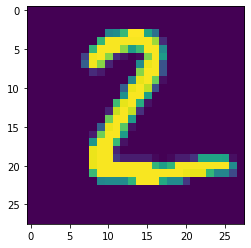

2


In [6]:
plt.imshow(x_test[1])
plt.show()
print(y_test[1])

2. Sharpened image

Kernels used for diff purpose - https://en.wikipedia.org/wiki/Kernel_(image_processing)

In [7]:
#Mask used to sharpen image 
kernel = np.array([[0,-1,0],
                   [-1,5,-1],
                   [0,-1,0]])
im_sharp = cv2.filter2D(x_test[1], -1, kernel)

Text(0.5, 1.0, 'sharpened Image')

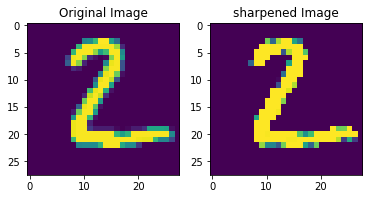

In [8]:
#display original image 
plt.subplot(121),plt.imshow(x_test[1])
plt.title('Original Image')


#Code to display sharpened image 
plt.subplot(122),plt.imshow(im_sharp)
plt.title('sharpened Image')

#3.  Gray scale to black and white

Text(0.5, 1.0, 'Binary Inverted')

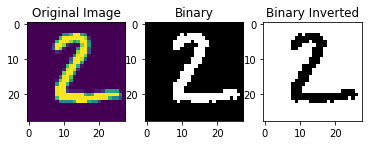

In [13]:
(thresh, im_black_inv) = cv2.threshold(im_sharp, 0,1, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
(thresh, im_black) = cv2.threshold(im_sharp, 0,1, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

#display original image 
plt.subplot(131),plt.imshow(x_test[1])
plt.title('Original Image')


#Code to display binary image 
plt.subplot(132),plt.imshow(im_black, cmap=plt.cm.gray)
plt.title('Binary')

#Code to display binary image (inverted)
plt.subplot(133),plt.imshow(im_black_inv ,cmap=plt.cm.gray)
plt.title('Binary Inverted')

4. thinning of lines

##Example for skeletonize 

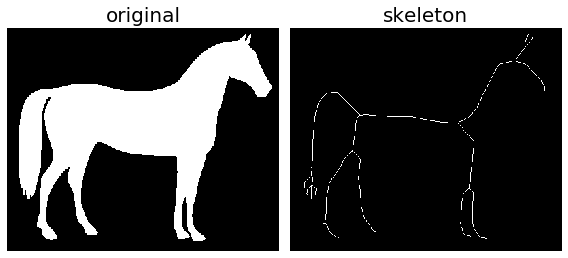

In [14]:
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

# Invert the horse image
image = invert(data.horse())

# perform skeletonization
skeleton = skeletonize(image)

# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

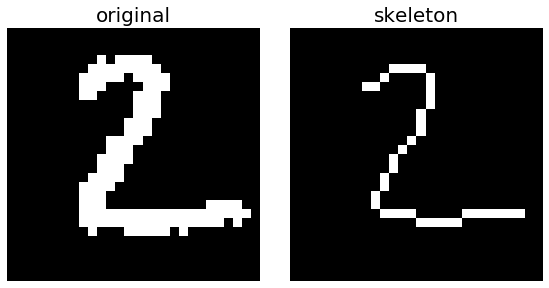

In [15]:
from skimage.morphology import skeletonize
from skimage.util import invert

skeleton = skeletonize(im_black)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(im_black, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

#5. endpoint detection

In [16]:
def skeleton_endpoints(skel):
    # make out input nice, possibly necessary
    skel = skel.copy()
    skel[skel!=0] = 1
    skel = np.uint8(skel)

    # apply the convolution
    kernel = np.uint8([[1,  1, 1],
                       [1, 10, 1],
                       [1,  1, 1]])
    src_depth = -1
    filtered = cv2.filter2D(skel,src_depth,kernel)

    # now look through to find the value of 1
    out = np.zeros_like(skel)
    out[np.where(filtered==1)] = 1
    return out


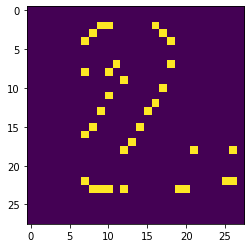

In [17]:
plt.imshow(skeleton_endpoints(im_black))

6. Segmentation

Text(0.5, 1.0, 'Segmented Image')

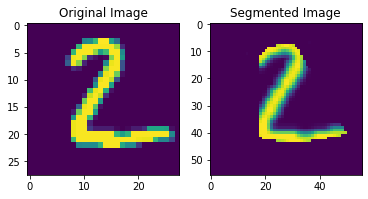

In [18]:
img = x_test[1]
mser = cv2.MSER_create()

#Resize the image so that MSER can work better
img = cv2.resize(img, (img.shape[1]*2, img.shape[0]*2))

#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
vis = img.copy()

regions = mser.detectRegions(img)
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions[0]]
cv2.polylines(vis, hulls, 1, (0,255,0)) 

plt.subplot(121),plt.imshow(x_test[1])
plt.title('Original Image')


#Code to display sharpened image 
plt.subplot(122),plt.imshow(vis)
plt.title('Segmented Image')



##7. gaussian blur

(Text(0.5, 1.0, 'Blurred Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

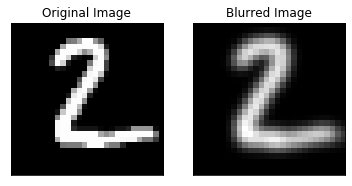

In [19]:
gaussian = cv2.GaussianBlur(x_test[1],(5,5),0)

plt.subplot(121),plt.imshow(x_test[1],cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(gaussian,cmap = 'gray')
plt.title('Blurred Image'), plt.xticks([]), plt.yticks([])

#8 Cannys Edge detection on blurred image 

Canny edge detection


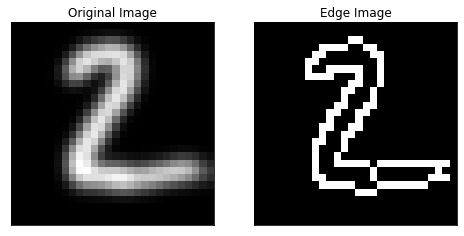

In [20]:

plt.figure(figsize=(8,8))
print("Canny edge detection")

edges_result = cv2.Canny(gaussian,100,200)
plt.subplot(121),plt.imshow(gaussian,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges_result,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

9. Sobel X Sobel Y

(Text(0.5, 1.0, 'Sobel Y on Blurred image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

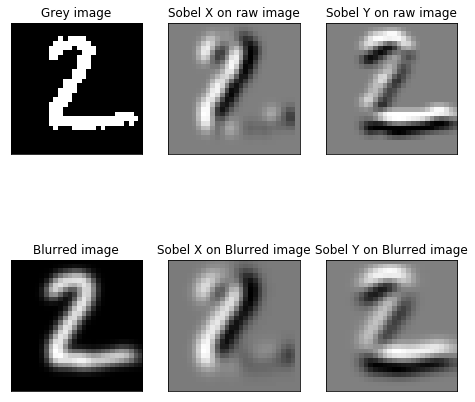

In [21]:
plt.figure(figsize=(8,8))

sobelx = cv2.Sobel(im_black,cv2.CV_64F,1,0,ksize=7)# x
sobely = cv2.Sobel(im_black,cv2.CV_64F,0,1,ksize=5)# y

#Displaying a image without any filter 
plt.subplot(2,3,1),plt.imshow(im_black,cmap = 'gray')
plt.title('Grey image'), plt.xticks([]), plt.yticks([])

#Applying sobel X on normal image 
plt.subplot(2,3,2),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X on raw image'), plt.xticks([]), plt.yticks([])

#Applying sobel Y on normal image 
plt.subplot(2,3,3),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y on raw image'), plt.xticks([]), plt.yticks([])

#Displaying a simple gaussian blurred image 
plt.subplot(2,3,4),plt.imshow(gaussian,cmap = 'gray')
plt.title('Blurred image'), plt.xticks([]), plt.yticks([])

#Applying Sobel X edge detection on blurred image   
sobelx_gaussian = cv2.Sobel(gaussian,cv2.CV_64F,1,0,ksize=7)# x
plt.subplot(2,3,5),plt.imshow(sobelx_gaussian,cmap = 'gray')
plt.title('Sobel X on Blurred image'), plt.xticks([]), plt.yticks([])

#Applying Sobel Y edge detection on blurred image 
sobely_gaussian = cv2.Sobel(gaussian,cv2.CV_64F,0,1,ksize=5)# x
plt.subplot(2,3,6),plt.imshow(sobely_gaussian,cmap = 'gray')
plt.title('Sobel Y on Blurred image'), plt.xticks([]), plt.yticks([])


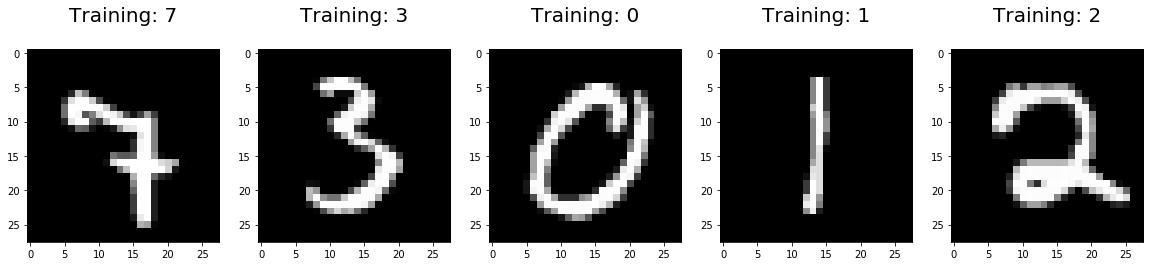

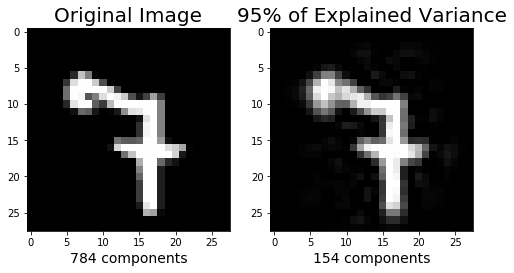

In [22]:
import pandas as pd
import numpy as np 
# Suppress scientific notation
np.set_printoptions(suppress=True)

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

##Corrected code below changed the method to fetch_openml the original code is deprecated.
# Used for Downloading MNIST
from sklearn.datasets import fetch_openml

# Used for Splitting Training and Test Sets
from sklearn.model_selection import train_test_split

%matplotlib inline

mnist = fetch_openml('mnist_784', version=1)

mnist.data.shape

train_img, test_img, train_lbl, test_lbl = train_test_split(
    mnist.data, mnist.target, test_size=1/7.0, random_state=0)

#print(train_img.shape)

#print(train_lbl.shape)

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    #Corrected below code the label value in dataset is of string type, probably it was integer earler.
    plt.title('Training: %i\n' % int(label), fontsize = 20)

pca = PCA(.95)

pca.fit(train_img)

#pca.n_components_

components = pca.transform(train_img)
approximation = pca.inverse_transform(components)

plt.figure(figsize=(8,4));

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(train_img[0].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 154 principal components
plt.subplot(1, 2, 2);
plt.imshow(approximation[0].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('154 components', fontsize = 14)
plt.title('95% of Explained Variance', fontsize = 20);


Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97     

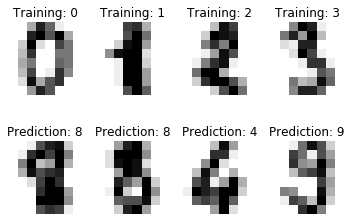

In [23]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# We learn the digits on the first half of the digits
classifier.fit(X_train, y_train)

# Now predict the value of the digit on the second half:
predicted = classifier.predict(X_test)

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))


plt.show()